# Projet : Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique

---

## 1. Chargement des données

- Importer les données à l’aide de **pandas**.
- Vérifier le type et la structure des colonnes avec `df.info()` et `df.head()`.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv('../data/dataset.csv')



## 2.Analyse exploratoire des données (EDA)

L'objectif de cette étape est de comprendre la structure générale du jeu de données, identifier les valeurs manquantes et doublons, analyser la distribution des variables numériques, et étudier les relations entre variables via des visualisations.

- **Structure générale** : types de données, dimensions, aperçu des premières lignes.


In [18]:
# Informations générales sur le dataset
print("\n \ntype de donnes :", df.dtypes)

# Affichage des premières lignes
print("\n \n📋 Aperçu des 5 premières lignes :\n")
display(df.head())

# Informations sur la structure des données
print("\n \n Les Statistiques sur les colonnes :\n")
print(df.describe())


 
type de donnes : Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

 
📋 Aperçu des 5 premières lignes :



,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33



 
 Les Statistiques sur les colonnes :

       Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760

- **Valeurs manquantes** : détection et comptage.


In [19]:
# Vérification des valeurs manquantes
vm=df.isnull().sum()
if vm.sum() > 0:
    print("\n \n❗️ Valeurs manquantes détectées :")
else:
    print("\n \n✅ Aucune valeur manquante détectée.")



 
✅ Aucune valeur manquante détectée.


- **Doublons** : détection et comptage.


In [20]:

# Recherche des doublons
print(f"Nombre de doublons : {df.duplicated().sum()}")


Nombre de doublons : 0


- **Distribution des variables numériques** : visualisation par histogrammes.


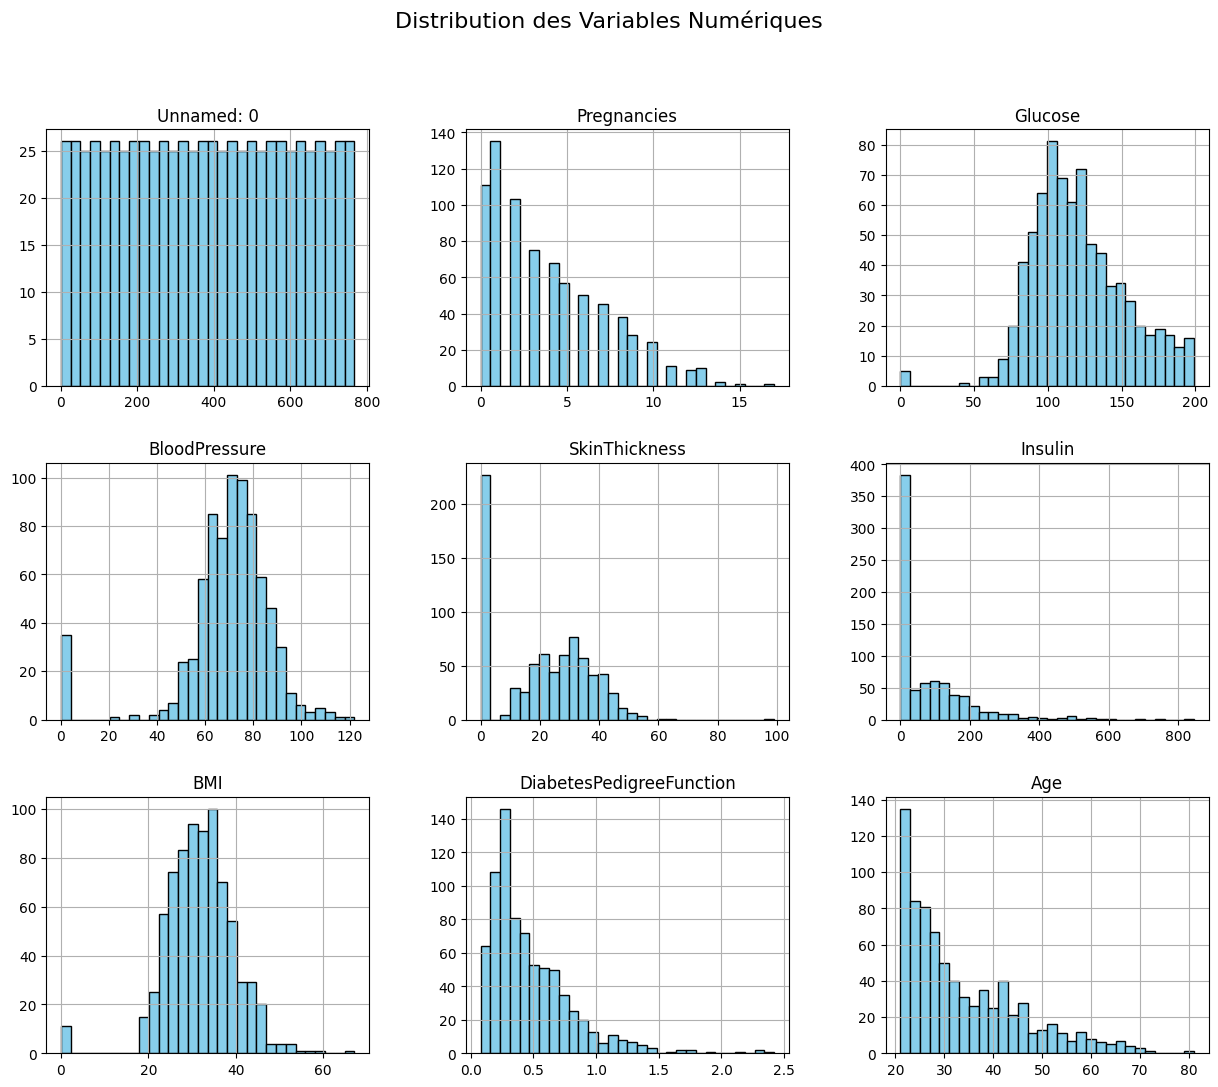

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution des Variables Numériques', fontsize=16)
plt.show()

- **Relations entre variables** : analyse via matrice de corrélation et visualisations graphiques.


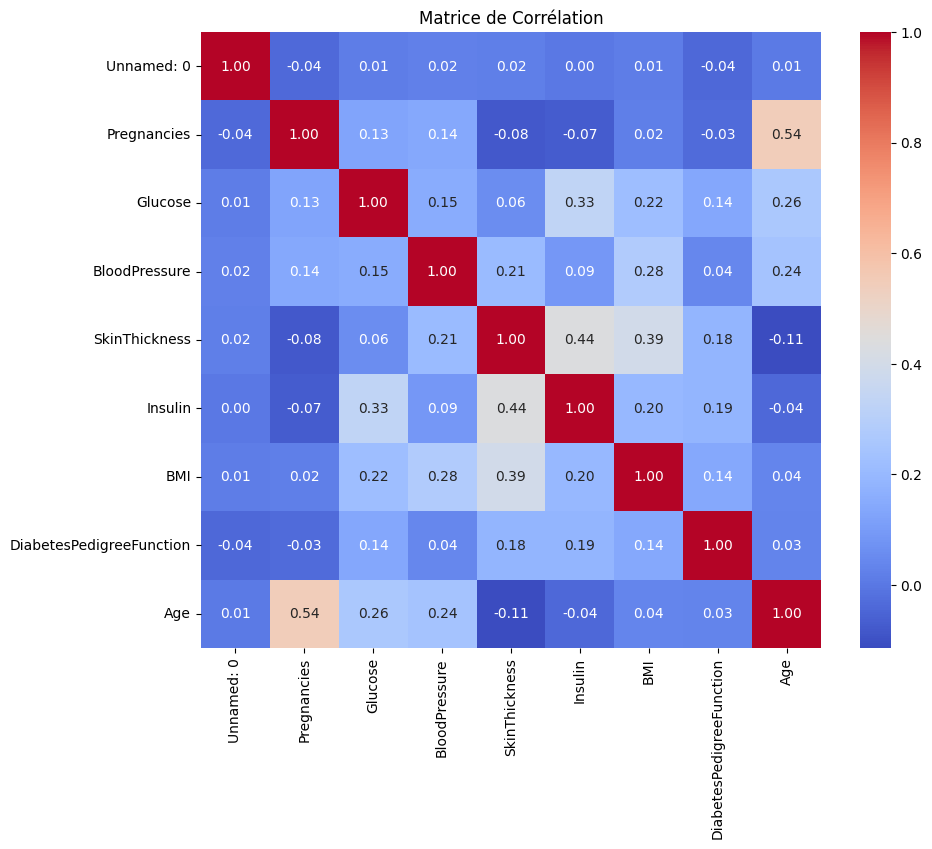

In [22]:
# Matrice de corrélation avec heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

## 3. Prétraitement des données

### 3.1 Gestion des valeurs manquantes

 traiter les valeurs manquantes. Ici, nous utilisons une suppression simple des lignes contenant des valeurs manquantes.


In [23]:
print(f"Données avant suppression des valeurs manquantes : {df.shape}")
df = df.dropna()
print(f"Données après suppression des valeurs manquantes : {df.shape}")
print("we dont have missing values")

Données avant suppression des valeurs manquantes : (768, 9)
Données après suppression des valeurs manquantes : (768, 9)
we dont have missing values


### 3.2 Détection et suppression des valeurs aberrantes (outliers)

Utilisation de la méthode de l'IQR (Interquartile Range) pour détecter et supprimer les outliers dans les colonnes numériques.

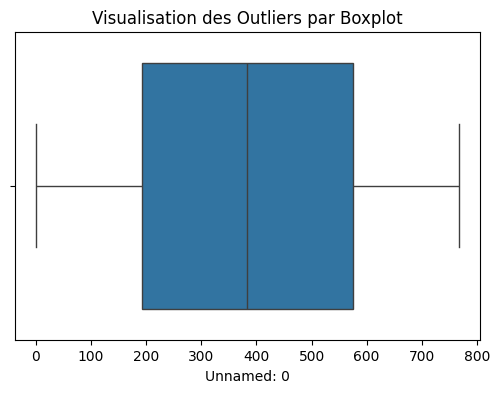

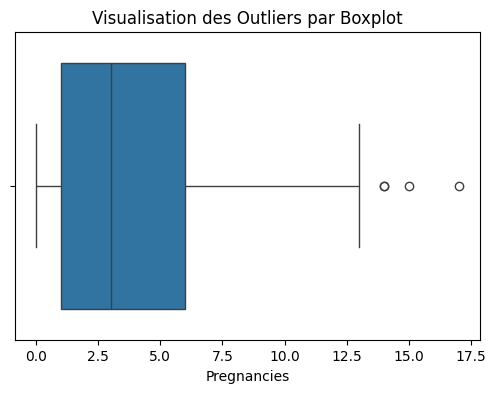

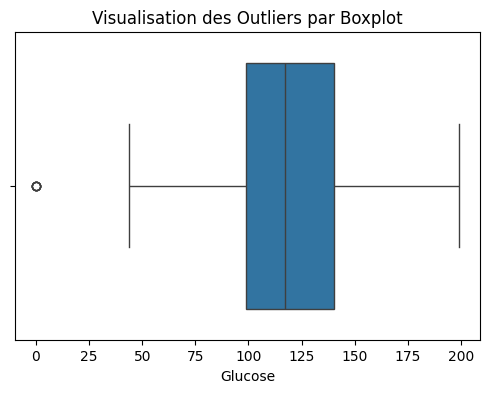

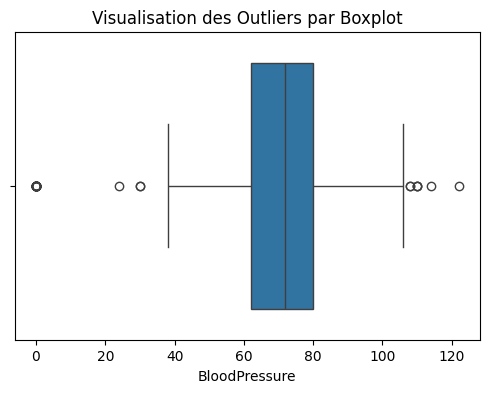

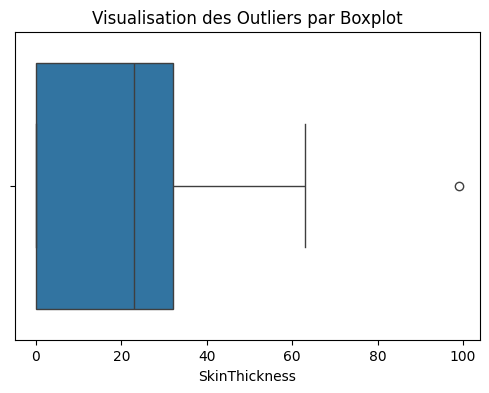

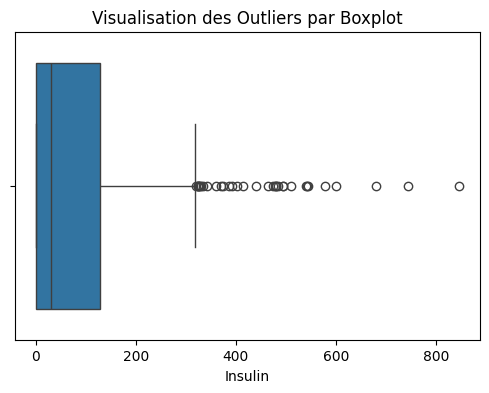

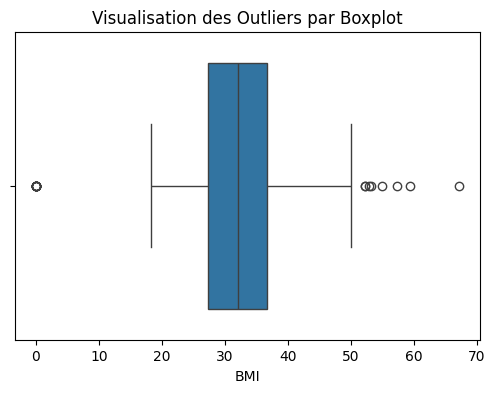

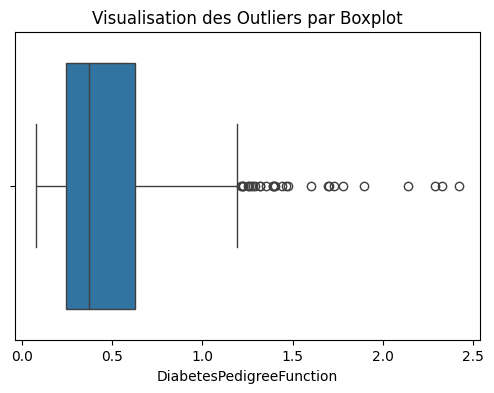

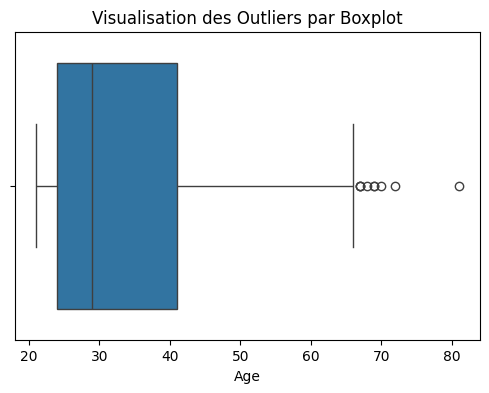

In [24]:
#visualisation des outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[col], orient='h')
    plt.title("Visualisation des Outliers par Boxplot")
    plt.show()

In [25]:
import pandas as pd

# Supposons que df est déjà défini
numeric_cols = df.select_dtypes(include='number').columns

outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    
    if outliers:  # Ne lister que si des outliers existent
        outliers_dict[col] = outliers

# Affichage
for col, values in outliers_dict.items():
    print(f"Outliers dans '{col}': {values[:100]}{' ...' if len(values) > 100 else ''} (total: {len(values)})")


Outliers dans 'Pregnancies': [15, 17, 14, 14] (total: 4)
Outliers dans 'Glucose': [0, 0, 0, 0, 0] (total: 5)
Outliers dans 'BloodPressure': [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0] (total: 45)
Outliers dans 'SkinThickness': [99] (total: 1)
Outliers dans 'Insulin': [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510] (total: 34)
Outliers dans 'BMI': [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0] (total: 19)
Outliers dans 'DiabetesPedigreeFunction': [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394] (total: 29)
Outliers dans 'Age': [69, 67, 72, 81, 67, 67, 70, 6

In [26]:
# Liste des colonnes numériques
# Convertir toutes les colonnes numériques en float pour éviter le warning


numeric_cols = df.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    df[col] = df[col].astype(float)
# Étape 1 : Suppression des valeurs absurdes
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['BMI'] != 0)]

# Étape 2 : Capping manuel de certaines colonnes
df.loc[df['Insulin'] > 545, 'Insulin'] = 545
df.loc[df['DiabetesPedigreeFunction'] > 1.5, 'DiabetesPedigreeFunction'] = 1.5

# Étape 3 : Capping IQR pour les autres colonnes numériques
for col in numeric_cols:
   

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if col in ['Insulin', 'DiabetesPedigreeFunction']:
        df.loc[df[col] < lower_bound, col] = lower_bound
        continue  
    # Capping des valeurs extrêmes
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

In [27]:
# #visualisation des outliers
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(data=df[col], orient='h')
#     plt.title("Visualisation des Outliers par Boxplot")
#     plt.show()

### 3.3 Sélection des variables pertinentes

On sélectionne les colonnes cliniques les plus pertinentes pour le clustering :

In [28]:
cols=[ "Glucose", "BMI", "DiabetesPedigreeFunction", "Age"]
df_cluster=df[cols]

## 3.4 Analyse exploratoire des relations entre variables

On utilise un `pairplot` pour visualiser les relations entre chaque paire de variables.

<Figure size 1000x800 with 0 Axes>

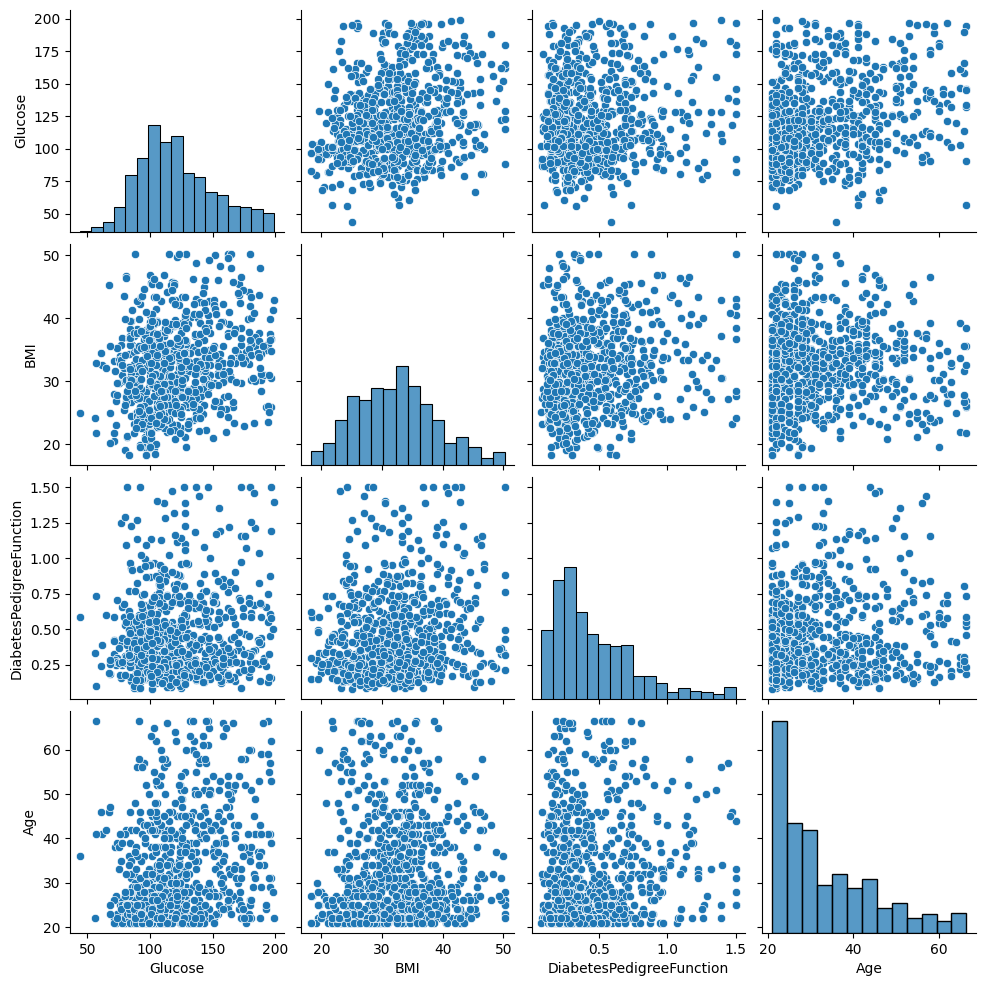

In [29]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_cluster)
plt.show()

## 3.5  Mise à l’échelle des variables (standardisation)

Avant le clustering, on applique une standardisation avec `StandardScaler`
pour que toutes les variables soient sur la même échelle.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled

array([[ 0.84993279,  0.17919472,  0.51622594,  1.43170087],
       [-1.20026207, -0.86991157, -0.38418983, -0.19897412],
       [ 1.98892994, -1.36449025,  0.66303286, -0.11314912],
       ...,
       [-0.02872215, -0.9298605 , -0.73000168, -0.28479912],
       [ 0.13399173, -0.34535842, -0.39071458,  1.17422587],
       [-0.93991986, -0.30039672, -0.50163537, -0.88557411]],
      shape=(724, 4))